In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
raw_m = pd.read_csv('men.dat', header=None)
raw_w = pd.read_csv('women.dat', header=None)

# Part 1
Plot the histogram of women and men heights.

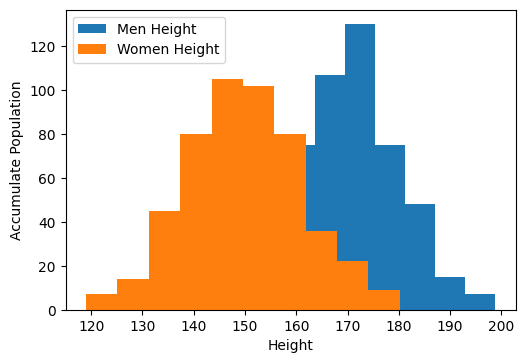

In [3]:
fig_hist = plt.figure(figsize=(9,6))
ax_hist = fig_hist.add_axes([0.1, 0.1, 0.5, 0.5])
ax_hist.hist(raw_m, label='Men Height')
ax_hist.hist(raw_w, label='Women Height')
ax_hist.set_ylabel('Accumulate Population')
ax_hist.set_xlabel('Height')
plt.legend()
fig_hist.show()

In [4]:
height_min = min(min(raw_w[0]), min(raw_m[0])) - 1
height_max = max(max(raw_w[0]), max(raw_m[0])) + 4
height_width = 4
height_edge = np.arange(height_min, height_max, height_width)
height_mid = np.zeros(len(height_edge) - 1)
for i in range(len(height_mid)):
    height_mid[i] = (height_edge[i] + height_edge[i+1]) / 2
height_mid

array([120., 124., 128., 132., 136., 140., 144., 148., 152., 156., 160.,
       164., 168., 172., 176., 180., 184., 188., 192., 196., 200.])

In [5]:
hist_m, height_edge = np.histogram(raw_m, height_edge)
hist_w, height_edge = np.histogram(raw_w, height_edge)
prob_m = hist_m/(hist_m+hist_w)
prob_w = hist_w/(hist_m+hist_w)

## Part1-2

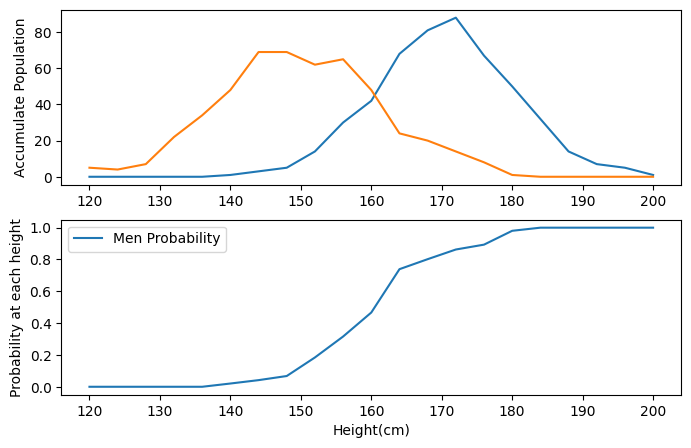

In [6]:
fig_hist2 = plt.figure(figsize=(8,5))
ax_hist2_1 = fig_hist2.add_subplot(211)
ax_hist2_1.plot(height_mid, hist_m, label='Men Height')
ax_hist2_1.plot(height_mid, hist_w, label='Women Height')
ax_hist2_1.set_ylabel('Accumulate Population')
ax_hist2_2 = fig_hist2.add_subplot(212)
ax_hist2_2.plot(height_mid, prob_m, label='Men Probability')
# ax_hist2_2.plot(height_mid, prob_w, label='Women Probability')
ax_hist2_2.set_ylabel('Probability at each height')
ax_hist2_2.set_xlabel('Height(cm)')
plt.legend()
fig_hist2.show()

# Part 2
Create a **logistic function**

In [7]:
def logistic_fn(beta, x):
    exp = np.exp(beta[0] + (beta[1]*x))
    logistic = exp/(1+exp)
    return logistic

def rss_fn(beta, x, prob):
    prob_pred = logistic_fn(beta, x)
    rss = np.sum((prob - prob_pred)**2)
    return rss

## Fit the model logistic fn

In [8]:
beta_init = [0.0, 0.0]
result = minimize(rss_fn, beta_init, args=(height_mid, prob_m))
beta_fit = result.x
print(f'Fitted Parameters:{beta_fit} ')
print(f'P(x) = 0.5 at x={-beta_fit[0]/beta_fit[1]} ')

Fitted Parameters:[-29.84458758   0.18632114] 
P(x) = 0.5 at x=160.17821821703345 


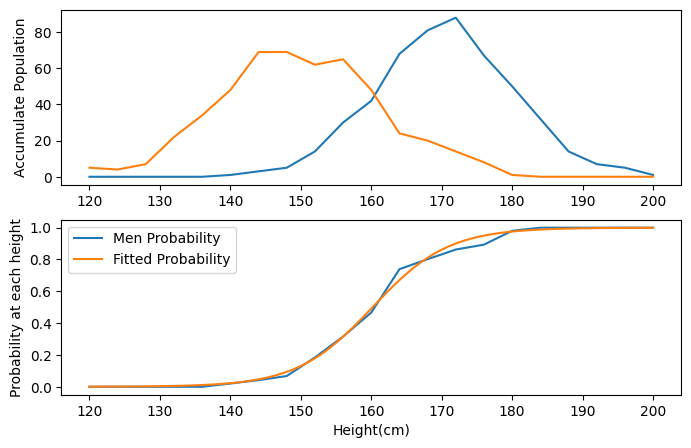

In [9]:
height_plot = np.linspace(height_mid.min(), height_mid.max(), 1000)
prob_fit = logistic_fn(beta_fit, height_plot)
fig_fit = plt.figure(figsize=(8,5))
ax_fit1 = fig_fit.add_subplot(211)
ax_fit1.plot(height_mid, hist_m, label='Men Height')
ax_fit1.plot(height_mid, hist_w, label='Women Height')
ax_fit1.set_ylabel('Accumulate Population')
ax_fit2 = fig_fit.add_subplot(212)
ax_fit2.plot(height_mid, prob_m, label='Men Probability')
ax_fit2.plot(height_plot, prob_fit, label='Fitted Probability')
ax_fit2.set_ylabel('Probability at each height')
ax_fit2.set_xlabel('Height(cm)')
plt.legend()
fig_fit.show()

Build function to fit **maximum log likelihood** model.

In [10]:
def minus_log_likelihood(beta, x_m, x_w):
    p_m = logistic_fn(beta, x_m)
    p_w = logistic_fn(beta, x_w)
    loglike = np.sum(np.log(p_m)) + np.sum(np.log(1.0 - p_w))
    return -loglike

## Fit maximum log-likelihood by using minimize of negative log-likelihood fn.

In [11]:
result_llh = minimize(minus_log_likelihood, beta_init, args=(raw_m[0], raw_w[0]), method='Nelder-Mead')
beta_maxllh = result_llh.x
print(f'Fitted Parameters:{beta_maxllh} ')
print(f'P(x) = 0.5 at x={-beta_maxllh[0]/beta_maxllh[1]} ')
result_llh

Fitted Parameters:[-29.6733334    0.18500613] 
P(x) = 0.5 at x=160.39107886277463 


 final_simplex: (array([[-29.6733334 ,   0.18500613],
       [-29.67340844,   0.18500661],
       [-29.67340955,   0.18500659]]), array([369.23987623, 369.23987624, 369.23987624]))
           fun: 369.23987623480116
       message: 'Optimization terminated successfully.'
          nfev: 159
           nit: 85
        status: 0
       success: True
             x: array([-29.6733334 ,   0.18500613])

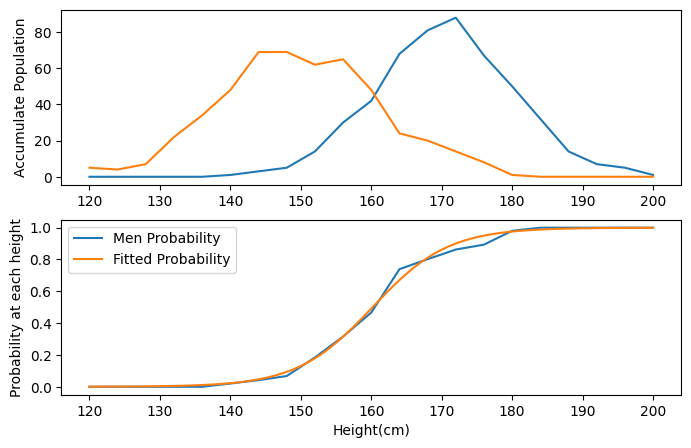

In [12]:
probFit_llh = logistic_fn(beta_maxllh, height_plot)
fig_fit2 = plt.figure(figsize=(8,5))
ax_fit2_1 = fig_fit2.add_subplot(211)
ax_fit2_1.plot(height_mid, hist_m, label='Men Height')
ax_fit2_1.plot(height_mid, hist_w, label='Women Height')
ax_fit2_1.set_ylabel('Accumulate Population')
ax_fit2_2 = fig_fit2.add_subplot(212)
ax_fit2_2.plot(height_mid, prob_m, label='Men Probability')
ax_fit2_2.plot(height_plot, prob_fit, label='Fitted Probability')
ax_fit2_2.set_ylabel('Probability at each height')
ax_fit2_2.set_xlabel('Height(cm)')
plt.legend()
fig_fit2.show()

# Part 3
Varying the threshold value to evaluate the model

Build function to count element for confusion matrix.

In [13]:
def classify(x_threshold, x_m, x_w):
    tp = np.count_nonzero(x_m >= x_threshold)
    fn = np.count_nonzero(x_m < x_threshold)
    fp = np.count_nonzero(x_w >= x_threshold)
    tn = np.count_nonzero(x_w < x_threshold)
    return tp, fn, fp, tn

Create standard grid for dataset.

In [14]:
num_pt = 5000
height_threshold = np.linspace(height_min, height_max, num_pt)
tp_col = np.zeros(num_pt)
tn_col = np.zeros(num_pt)
fp_col = np.zeros(num_pt)
fn_col = np.zeros(num_pt)

for i in range(num_pt):
    h_threshold = height_threshold[i]
    tp, fn, fp, tn = classify(h_threshold, raw_m, raw_w)
    tp_col[i] = tp
    tn_col[i] = tn
    fp_col[i] = fp
    fn_col[i] = fn

Calculate accuracy, precision, sensitivity, specificity, F1-score

In [15]:
accuracy_col = (tp_col + tn_col) / (tp_col + tn_col + fp_col + fn_col)
sensitivity_col = tp_col / (tp_col + fn_col)
specificity_col = tn_col / (tn_col + fp_col)
precision_col = tp_col / (tp_col + fp_col)
f1_score = 2 * (precision_col * sensitivity_col)/(precision_col + sensitivity_col)

/tmp/ipykernel_18009/275295706.py:4: RuntimeWarning: invalid value encountered in divide
  precision_col = tp_col / (tp_col + fp_col)


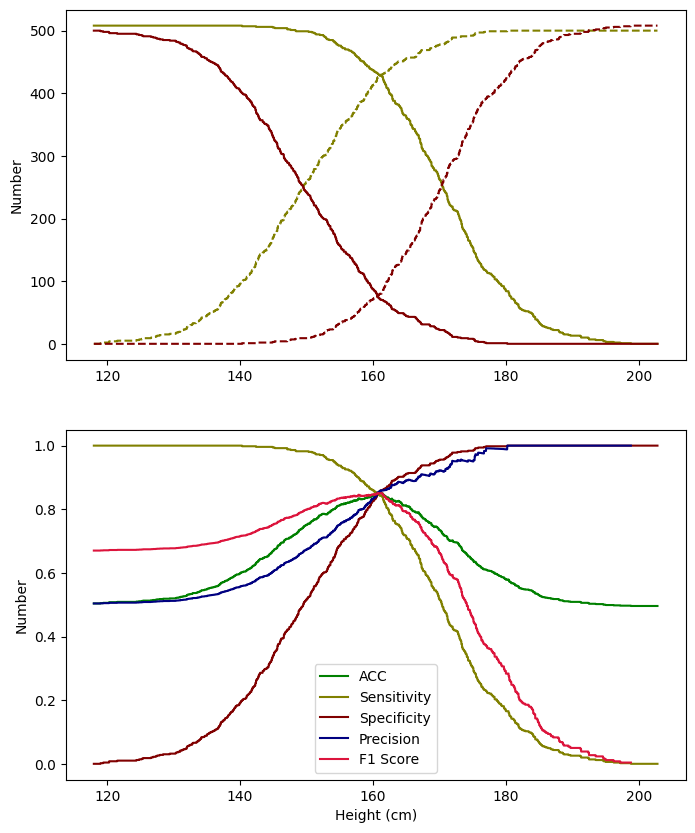

In [16]:
fig_threshold =  plt.figure(figsize=(8,10))
ax_thresh = fig_threshold.add_subplot(211)
ax_thresh.plot(height_threshold, tp_col, '-', label = 'TP', color='olive')
ax_thresh.plot(height_threshold, tn_col, '--', label = 'TN', color='olive')
ax_thresh.plot(height_threshold, fp_col, '-', label = 'FP', color = 'maroon')
ax_thresh.plot(height_threshold, fn_col, '--', label = 'FN', color = 'maroon')
ax_thresh.set_ylabel('Number')
ax_thresh2 = fig_threshold.add_subplot(212)
ax_thresh2.plot(height_threshold, accuracy_col, '-', label = 'ACC', color='green')
ax_thresh2.plot(height_threshold, sensitivity_col, '-', label = 'Sensitivity', color='olive')
ax_thresh2.plot(height_threshold, specificity_col, '-', label = 'Specificity', color = 'maroon')
ax_thresh2.plot(height_threshold, precision_col, '-', label = 'Precision', color = 'navy')
ax_thresh2.plot(height_threshold, f1_score, '-', label = 'F1 Score', color = 'crimson')
ax_thresh2.set_ylabel('Number')
ax_thresh2.set_xlabel('Height (cm)')
plt.legend()
fig_threshold.show()

# Part 4
## Calculate confusion matrix related score

In [24]:
height_pred = np.linspace(0, 1, 1000)

def classify_pred(x_threshold, xp):
    if xp => 0.5:
        tp = np.count_nonzero(xp >= x_threshold)
        fn = np.count_nonzero(xp < x_threshold)
    else:
        fp = np.count_nonzero(x_w >= x_threshold)
        tn = np.count_nonzero(x_w < x_threshold)

num_pred = 1000
tp_col = np.zeros(num_pred)
tn_col = np.zeros(num_pred)
fp_col = np.zeros(num_pred)
fn_col = np.zeros(num_pred)

for i in range(num_pred):
    p_threshold = height_pred[i]
    tp, fn, fp, tn = classify(height_pred, raw_m, raw_w)
    tp_col[i] = tp
    tn_col[i] = tn
    fp_col[i] = fp
    fn_col[i] = fn

array([5.68126967e-04, 5.76601712e-04, 5.85202800e-04, 5.93932114e-04,
       6.02791561e-04, 6.11783081e-04, 6.20908638e-04, 6.30170230e-04,
       6.39569881e-04, 6.49109647e-04, 6.58791613e-04, 6.68617897e-04,
       6.78590646e-04, 6.88712040e-04, 6.98984293e-04, 7.09409650e-04,
       7.19990389e-04, 7.30728822e-04, 7.41627297e-04, 7.52688196e-04,
       7.63913934e-04, 7.75306965e-04, 7.86869779e-04, 7.98604900e-04,
       8.10514894e-04, 8.22602361e-04, 8.34869942e-04, 8.47320315e-04,
       8.59956201e-04, 8.72780358e-04, 8.85795586e-04, 8.99004728e-04,
       9.12410667e-04, 9.26016330e-04, 9.39824687e-04, 9.53838751e-04,
       9.68061581e-04, 9.82496282e-04, 9.97146003e-04, 1.01201394e-03,
       1.02710334e-03, 1.04241749e-03, 1.05795973e-03, 1.07373346e-03,
       1.08974210e-03, 1.10598917e-03, 1.12247818e-03, 1.13921275e-03,
       1.15619653e-03, 1.17343320e-03, 1.19092653e-03, 1.20868034e-03,
       1.22669848e-03, 1.24498489e-03, 1.26354356e-03, 1.28237851e-03,
      

## Plot ROC-AUC and PRC curve

In [ ]:
fig_roc_prc = plt.figure(figsize=(8, 10))
plt.plot(1.0 - specificity_col, sensitivity_col, '-b', label="ROC curve")
plt.xlabel("1 - specificity")
plt.ylabel("sensitivity")
plt.legend (loc="upper left")
plt.show()